In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from pandas_datareader import data
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
import pyfolio as pf
%matplotlib inline

/Users/janviaswani/opt/anaconda3/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
import csv
df = pd.read_csv('../Final_stock_data_V2.csv')
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
1,ABT,Abbott Laboratories,Healthcare,Increase,Above Fair Price,OverValued,Average,118.2900,0.181179,2.091710e+11,...,0.74,3.940,0.1318,22.924420,30.022842,51.234756,25.96,0.109154,0.249769,0.247649
2,ACN,Accenture plc,Technology,Increase,Above Fair Price,OverValued,Sustainable,323.9050,0.208836,2.047083e+11,...,1.21,9.613,0.1135,31.025385,33.694477,121.148794,9.45,0.166287,0.254874,0.245322
3,ADM,Archer-Daniels-Midland Company,Consumer Defensive,Increase,Above Fair Price,OverValued,Not Sustainable,76.9850,0.122815,4.327843e+10,...,0.81,4.790,0.0660,14.804809,16.072025,19.449588,36.42,0.117663,0.252289,0.150693
4,ADP,"Automatic Data Processing, Inc.",Industrials,Increase,Above Fair Price,OverValued,Sustainable,201.0100,0.182708,8.443324e+10,...,0.83,6.460,0.1371,26.483530,31.116098,90.801919,14.18,0.120094,0.272415,0.178939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
934,ZD,"Ziff Davis, Inc.",Communication Services,Increase,Above Fair Price,OverValued,No Data,102.4800,0.145864,4.941668e+09,...,1.01,4.120,0.1140,14.193907,24.873789,38.485339,999.00,0.141975,0.308007,0.055993
935,ZUMZ,Zumiez Inc.,Consumer Cyclical,Decrease,Above Fair Price,UnderValued,No Data,42.6600,0.035214,9.777245e+08,...,1.68,4.870,0.1500,9.233767,8.759754,21.330001,999.00,0.223419,0.513665,0.157523
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


<AxesSubplot:>

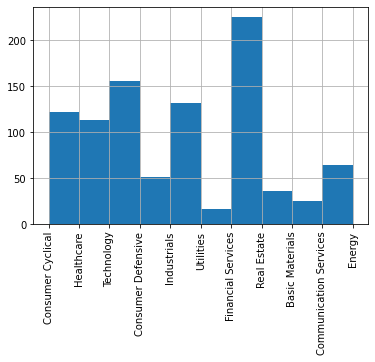

In [3]:
df['sector'].hist(xrot=90)

## Filter based on 2/3 criteria

In [4]:
def check_criteria(each):
    check = []
    if each["capm_status"] == "UnderValued":
        check.append(True)
    if each["Earnings_expectation"] == "Increase":
        check.append(True)
    if each["irv_status"] == "Below Fair Price":
        check.append(True)
    return check

In [5]:
def check_number(criteria):
    if len(criteria) >= 2:
        return True
    else:
        return False

In [6]:
rows = []
for i in range(938):
    each = df.iloc[i]
    criteria = check_criteria(each)
    result = check_number(criteria)
    if result:
        rows.append(i)

In [7]:
len(rows)

476

In [8]:
df = df.iloc[rows]
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,1.43,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,1.55,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,1.14,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,1.95,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,XOMA,XOMA Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,20.7600,-0.034853,2.348205e+08,...,0.81,0.082,0.1900,-90.260870,253.170730,14.120154,999.00,0.117663,0.689078,0.371572
932,XP,XP Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,34.1100,-0.001020,1.908622e+10,...,1.91,0.986,0.0478,27.508064,34.594322,7.380346,999.00,0.251378,NaN,NaN
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


## Filter based on Volatility

In [9]:
df = df[df["AHV_5y"] < 0.6]

In [10]:
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,1.43,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,1.55,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,1.14,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,1.95,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,WAFD,"Washington Federal, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,No Data,35.9200,0.109876,2.342835e+09,...,0.85,2.390,0.0700,11.777049,15.029287,9.385982,999.00,0.122525,0.323025,0.026584
923,WDAY,"Workday, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,216.5600,0.160951,5.414000e+10,...,1.35,0.117,0.1579,60.831463,1850.940200,115.161464,13.09,0.183305,0.383779,0.213788
930,WWD,"Woodward, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,120.0800,0.111932,7.573710e+09,...,1.64,3.180,0.1820,25.333336,37.761005,76.863011,999.00,0.218557,0.389052,0.119014
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851


In [11]:
#total number of stocks for each sector 

df["sector"].value_counts()

Industrials               75
Technology                70
Consumer Cyclical         56
Financial Services        52
Healthcare                34
Communication Services    21
Basic Materials           15
Consumer Defensive        15
Energy                     9
Real Estate                8
Utilities                  1
Name: sector, dtype: int64

In [12]:
#df for each sector

df_BM = df.loc[df['sector'] == 'Basic Materials']
df_CS = df.loc[df['sector'] == 'Communication Services']
df_CC = df.loc[df['sector'] == 'Consumer Cyclical']
df_CD = df.loc[df['sector'] == 'Consumer Defensive']
df_energy = df.loc[df['sector'] == 'Energy']
df_FS = df.loc[df['sector'] == 'Financial Services']
df_healthcare = df.loc[df['sector'] == 'Healthcare']
df_industrials = df.loc[df['sector'] == 'Industrials']
df_RE = df.loc[df['sector'] == 'Real Estate']
df_tech = df.loc[df['sector'] == 'Technology']
df_utilities = df.loc[df['sector'] == 'Utilities']

## Helper Functions

In [13]:
def get_closeprice(ticker):    
    start_date = str(date.today().year - 5) +'-0'+ str(date.today().month) +'-'+ str(date.today().day)
    end_date = str(date.today())
    
    panel_data = data.DataReader([ticker],'yahoo', start_date, end_date)
    closes = panel_data[["Close", "Adj Close"]]
    
    return closes

In [14]:
def get_sharpe_ratio(ticker):
    
    closes = get_closeprice(ticker)
    adj_close = closes["Adj Close"]
    
    risk_free_ann_ret_rate = 0.0195  #assuming this rate based on the latest data
     
    #Rp
    returns_ts = adj_close.pct_change().dropna()
    
    #Average Rp
    avg_daily_ret = returns_ts.mean()

    #Average risk-free rate for the year (Annual rate / number of trading days to spread it out)
    returns_ts['RiskFree_Rate'] = risk_free_ann_ret_rate/252

    #Average Rf
    avg_rf_ret = returns_ts['RiskFree_Rate'].mean()

    #calculate sharpe ratio

    #Add the excess return columns for each ETF: Rp - Rf
    returns_ts['Excess_ret'] = returns_ts[ticker] - returns_ts['RiskFree_Rate']
    
    sharpe = ((avg_daily_ret[ticker] - avg_rf_ret) /returns_ts['Excess_ret'].std())*np.sqrt(252)

    return sharpe.round(3)

In [15]:
def get_return_series(ticker):
    closes = get_closeprice(ticker)
    return_series_close = (closes['Close'].pct_change()+ 1).cumprod() - 1
    return return_series_close

# Basic Materials

## Filtering Stocks based on Sharpe Ratio

In [16]:
sharpe_list = []
for i in range(len(df_BM)):
    each = df_BM.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [17]:
sharpe_list

[0.458,
 0.799,
 0.145,
 0.46,
 0.741,
 0.288,
 0.46,
 0.416,
 0.355,
 0.339,
 0.402,
 0.417,
 0.675,
 0.502,
 0.689]

In [18]:
df_BM["sharpe"] = sharpe_list
df_BM

<ipython-input-18-95ef34005f7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BM["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
42,CE,Celanese Corporation Celanese C,Basic Materials,Decrease,Below Fair Price,UnderValued,Not Sustainable,142.860,0.133471,1.555331e+10,...,24.792,0.2942,9.058972,5.762343,206.829589,30.53,0.173580,0.326016,0.120412,0.458
82,FCX,"Freeport-McMoRan, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,42.740,0.018945,6.276241e+10,...,2.641,0.2890,12.039437,16.183264,59.676070,34.50,0.270827,0.507643,0.234986,0.799
103,IFF,International Flavors & Fragran,Basic Materials,Increase,Above Fair Price,UnderValued,Average,134.770,0.111741,3.430530e+10,...,1.167,0.0449,25.476372,115.484146,28.441679,22.82,0.145622,0.293892,0.051737,0.145
129,LYB,LyondellBasell Industries NV,Basic Materials,Decrease,Below Fair Price,UnderValued,Average,100.590,0.160340,3.347474e+10,...,17.121,0.4701,6.613412,5.875241,458.528308,24.89,0.197892,0.398685,0.086687,0.460
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.640,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.741
170,PPG,"PPG Industries, Inc.",Basic Materials,Increase,Above Fair Price,UnderValued,Average,146.960,0.140960,3.488845e+10,...,5.951,0.1660,17.878345,24.695010,83.210006,24.51,0.158993,0.273559,0.082631,0.288
271,BCPC,Balchem Corporation,Basic Materials,Increase,Below Fair Price,OverValued,No Data,139.990,0.152557,4.533101e+09,...,2.860,0.2400,33.410503,48.947556,137.905521,999.00,0.094567,0.285427,0.108634,0.460
557,IOSP,Innospec Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,97.450,0.143631,2.401889e+09,...,3.688,0.0750,18.849129,26.423534,26.555069,999.00,0.183305,0.351408,0.076989,0.416
633,MEOH,Methanex Corporation,Basic Materials,Decrease,Below Fair Price,UnderValued,No Data,48.170,0.071476,3.656026e+09,...,3.279,0.2870,16.496574,14.690454,66.324349,999.00,0.282983,0.510453,0.015290,0.355
634,MERC,Mercer International Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,13.540,0.080362,8.941491e+08,...,1.264,0.0573,6.478469,10.712025,3.177548,999.00,0.233144,0.432586,0.046865,0.339


In [19]:
df_BM = df_BM[df_BM["sharpe"] > 0.5]
df_BM

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
82,FCX,"Freeport-McMoRan, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,42.740,0.018945,6.276241e+10,...,2.641,0.2890,12.039437,16.183264,59.676070,34.50,0.270827,0.507643,0.234986,0.799
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.640,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.741
809,SCHN,"Schnitzer Steel Industries, Inc",Basic Materials,Increase,Above Fair Price,UnderValued,No Data,41.580,0.019844,1.156909e+09,...,5.657,0.1000,5.766991,7.350186,13.935037,999.00,0.203970,0.472387,0.156052,0.675
852,SSRM,SSR Mining Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,19.525,0.006112,4.135610e+09,...,1.128,-0.2683,12.678572,17.309397,0.166831,999.00,0.145622,0.466643,0.122974,0.502
855,STLD,"Steel Dynamics, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,63.230,0.186302,1.254806e+10,...,11.005,0.3632,5.062450,5.745570,146.099525,34.29,0.202754,0.411506,0.159118,0.689


# Consumer Defensive

## Filtering Stocks based on Sharpe Ratio

In [20]:
sharpe_list = []
for i in range(len(df_CD)):
    each = df_CD.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [21]:
sharpe_list

[0.039,
 0.14,
 0.062,
 -0.303,
 0.44,
 0.329,
 0.278,
 0.061,
 0.131,
 0.313,
 0.302,
 0.042,
 0.312,
 0.123,
 0.28]

In [22]:
df_CD["sharpe"] = sharpe_list
df_CD

<ipython-input-22-7e23e832677b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CD["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
36,CAG,"ConAgra Brands, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,Not Sustainable,35.70,0.090652,1.712493e+10,...,2.481,0.0224,13.522727,14.389359,6.193629,32.92,0.115232,0.287178,0.000833,0.039
46,CL,Colgate-Palmolive Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,79.09,0.078620,6.666093e+10,...,3.140,0.0612,23.330381,25.187897,19.186076,22.12,0.094567,0.206239,0.051918,0.140
117,K,Kellogg Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,66.39,0.056187,2.264716e+10,...,3.668,0.0315,15.959135,18.099781,12.474271,26.78,0.090920,0.233473,0.006971,0.062
119,KHC,The Kraft Heinz Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Not Sustainable,39.79,-0.035146,4.870455e+10,...,1.858,-0.0244,15.071969,21.415500,4.528032,34.47,0.150484,0.322340,-0.118555,-0.303
191,SYY,Sysco Corporation,Consumer Defensive,Increase,Below Fair Price,UnderValued,Sustainable,84.05,0.143456,4.308874e+10,...,1.332,0.5309,19.964370,63.100600,551.757903,12.14,0.182089,0.361481,0.130098,0.440
306,CCEP,Coca-Cola Europacific Partners,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,54.09,0.128504,2.491753e+10,...,1.515,0.3135,20.258427,35.702972,89.469938,999.00,0.109154,0.295493,0.110419,0.329
438,FIZZ,National Beverage Corp.,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,42.33,0.219583,3.950329e+09,...,1.800,0.2556,22.162306,23.516668,46.665884,999.00,0.135897,0.463844,0.137329,0.278
500,HAIN,"The Hain Celestial Group, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,36.00,0.058080,3.343734e+09,...,0.962,0.1300,19.459460,37.422035,15.370851,999.00,0.099429,0.344834,-0.020295,0.061
569,JVA,"Coffee Holding Co., Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,4.05,-0.068383,2.311983e+07,...,0.092,0.1600,10.125000,44.021740,2.189104,999.00,0.176011,0.527264,-0.021047,0.131
609,LOPE,"Grand Canyon Education, Inc.",Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,86.29,0.170795,3.457951e+09,...,5.729,0.9000,13.588977,15.061965,3957.603724,999.00,0.075117,0.335656,0.079754,0.313


In [23]:
df_CD = df_CD[df_CD["sharpe"] > 0.5]
df_CD

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe


# Real Estate Sector

## Filtering Stocks based on Sharpe Ratio

In [24]:
sharpe_list = []
for i in range(len(df_RE)):
    each = df_RE.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [25]:
sharpe_list

[0.193, 0.68, 0.573, 0.833, 0.354, 0.363, 0.458, 0.168]

In [26]:
df_RE["sharpe"] = sharpe_list
df_RE

<ipython-input-26-3d0c71ae424c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RE["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
35,BXP,"Boston Properties, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,121.005,0.052115,1.890183e+10,...,2.044,0.0700,39.673770,59.200100,31.618901,13.57,0.160209,0.318134,0.015426,0.193
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.530,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.680
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.020,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.573
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.160,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.833
365,CTRE,"CareTrust REIT, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,17.580,0.133822,1.705837e+09,...,0.777,0.1020,17.580000,22.625483,5.988839,999.00,0.154131,0.425892,0.077533,0.354
485,GOOD,Gladstone Commercial Corporatio,Real Estate,Increase,Above Fair Price,UnderValued,No Data,21.090,0.095257,7.859906e+08,...,0.029,0.0600,-2109.000000,727.241400,5.064293,999.00,0.140759,0.386789,0.084844,0.363
581,LAMR,Lamar Advertising Company,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,109.850,0.167806,1.112110e+10,...,3.689,0.0300,23.422174,29.777718,20.371571,16.28,0.194245,0.413550,0.128521,0.458
906,UNIT,Uniti Group Inc.,Real Estate,Increase,Below Fair Price,UnderValued,No Data,11.085,-0.039440,2.616847e+09,...,0.171,0.3400,17.879032,64.824560,21.946654,999.00,0.146837,0.546158,-0.087307,0.168


In [27]:
df_RE = df_RE[df_RE["sharpe"] > 0.5]
df_RE

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.53,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.680
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.02,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.573
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.833


# Financial Services

## Filtering Stocks based on Sharpe Ratio

In [28]:
sharpe_list = []
for i in range(len(df_FS)):
    each = df_FS.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [29]:
sharpe_list

[0.666,
 0.037,
 0.255,
 0.448,
 0.145,
 0.3,
 0.478,
 0.377,
 0.342,
 0.316,
 0.504,
 0.552,
 0.284,
 0.391,
 0.693,
 0.178,
 0.043,
 0.093,
 0.233,
 0.115,
 0.074,
 0.83,
 0.628,
 0.264,
 0.445,
 0.052,
 0.407,
 0.165,
 0.31,
 -0.472,
 0.171,
 0.155,
 0.333,
 0.292,
 0.068,
 0.176,
 0.478,
 0.018,
 0.251,
 0.264,
 0.385,
 0.308,
 0.484,
 0.244,
 0.531,
 0.896,
 0.223,
 0.355,
 0.372,
 0.315,
 0.202,
 0.308]

In [30]:
df_FS["sharpe"] = sharpe_list
df_FS

<ipython-input-30-82850e6b4bab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FS["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.1100,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.666
28,BEN,"Franklin Resources, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,29.9300,0.009948,1.501872e+10,...,3.570,0.0949,7.876316,8.383754,9.619805,19.51,0.165071,0.345803,-0.016066,0.037
31,BK,The Bank of New York Mellon Cor,Financial Services,Increase,Above Fair Price,UnderValued,Average,55.7400,0.123563,4.603126e+10,...,3.925,0.1356,12.196937,14.201275,24.881978,22.79,0.158993,0.298729,0.053724,0.255
51,COF,Capital One Financial Corporati,Financial Services,Decrease,Below Fair Price,UnderValued,Average,153.6800,0.140197,6.540959e+10,...,26.739,0.4520,7.958571,5.747410,626.622996,23.22,0.219773,0.398322,0.129511,0.448
111,IVZ,Invesco Ltd,Financial Services,Increase,Above Fair Price,UnderValued,Not Sustainable,22.0725,0.030092,1.017999e+10,...,2.530,0.2130,7.911291,8.724308,17.835618,20.28,0.168718,0.427328,-0.024774,0.145
127,LNC,Lincoln National Corporation,Financial Services,Increase,Below Fair Price,UnderValued,Sustainable,69.3700,0.133150,1.253578e+10,...,6.972,0.4393,6.227109,9.949800,261.350358,16.91,0.275690,0.503721,0.019981,0.300
136,MET,"MetLife, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,69.5900,0.109501,5.853632e+10,...,5.992,0.0835,9.665278,11.613817,20.356189,14.74,0.172365,0.338744,0.114839,0.478
156,NTRS,Northern Trust Corporation,Financial Services,Increase,Above Fair Price,UnderValued,Average,118.0500,0.129134,2.451438e+10,...,6.340,0.1866,15.553360,18.619873,78.251831,24.39,0.160209,0.317205,0.083843,0.377
162,PBCT,People's,Financial Services,Increase,Above Fair Price,UnderValued,Average,21.0100,0.099441,8.992805e+09,...,0.702,0.1074,19.275229,29.928774,7.479217,23.64,0.139544,0.359543,0.052798,0.342
165,PFG,Principal Financial Group Inc,Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,71.6800,0.134755,1.900015e+10,...,6.220,0.1647,10.240000,11.524116,40.180390,17.00,0.213695,0.368267,0.065865,0.316


In [31]:
df_FS = df_FS[df_FS["sharpe"] > 0.5]
df_FS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.11,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.666
169,PNC,"PNC Financial Services Group, I",Financial Services,Increase,Above Fair Price,UnderValued,Average,204.41,0.161210,8.639205e+10,...,10.173,-0.0426,14.497163,20.093384,19.635067,22.64,0.182089,0.324564,0.131015,0.504
185,SBNY,Signature Bank,Financial Services,Increase,Above Fair Price,UnderValued,Average,337.79,0.196788,2.048102e+10,...,13.954,0.0632,19.570684,24.207396,83.343349,28.14,0.248947,0.404451,0.169671,0.552
197,TROW,"T. Rowe Price Group, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,142.56,0.120724,3.267447e+10,...,13.270,0.1220,10.678651,10.743029,57.098253,16.74,0.167502,0.300412,0.193441,0.693
317,CG,The Carlyle Group Inc.,Financial Services,Decrease,Below Fair Price,UnderValued,No Data,44.83,0.139004,1.598019e+10,...,7.730,0.2826,11.041873,5.799483,59.852092,999.00,0.193030,0.363420,0.276296,0.830
360,CSWC,Capital Southwest Corporation,Financial Services,Increase,Above Fair Price,UnderValued,No Data,24.42,0.082236,5.699872e+08,...,1.740,0.0100,12.652850,14.034483,3.796011,999.00,0.174796,0.330948,0.198592,0.628
838,SNEX,StoneX Group Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,77.30,0.125325,1.541957e+09,...,5.740,0.1900,10.980114,13.466900,52.576494,999.00,0.165071,0.381421,0.155673,0.531
869,TBBK,"The Bancorp, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,No Data,29.29,0.126627,1.668956e+09,...,1.825,0.1200,13.497696,16.049314,11.544390,999.00,0.177227,0.537796,0.404302,0.896


# Consumer Cyclical Sector

## Filtering Stocks based on Sharpe Ratio

In [32]:
sharpe_list = []
for i in range(len(df_CC)):
    each = df_CC.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [33]:
sharpe_list

[0.355,
 0.459,
 0.625,
 0.434,
 0.404,
 0.102,
 0.714,
 0.418,
 0.48,
 0.496,
 0.151,
 0.325,
 0.174,
 0.254,
 0.191,
 0.008,
 0.3,
 0.136,
 0.065,
 0.108,
 0.855,
 0.211,
 0.888,
 0.405,
 0.112,
 0.492,
 0.52,
 0.292,
 0.304,
 0.778,
 0.34,
 0.714,
 0.358,
 -0.121,
 -0.018,
 0.506,
 0.176,
 0.172,
 0.971,
 0.621,
 0.413,
 0.66,
 0.097,
 -0.025,
 0.667,
 0.325,
 0.402,
 0.483,
 0.382,
 0.215,
 0.472,
 0.092,
 0.498,
 0.251,
 0.236,
 0.222]

In [34]:
df_CC["sharpe"] = sharpe_list
df_CC

<ipython-input-34-bfbc42f5152d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CC["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,9.550,0.1525,13.932986,22.424082,1.091882e+02,12.97,0.171149,0.355467,0.049267,0.355
21,APTV,Aptiv PLC,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,139.9800,0.197323,3.786655e+10,...,2.941,0.4626,30.364424,47.596054,6.093763e+02,13.49,0.274474,0.428095,0.175759,0.459
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.625
80,F,Ford Motor Company,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Average,17.4300,0.074129,6.965446e+10,...,0.713,0.7767,8.758794,24.446003,4.370325e+02,29.57,0.150484,0.375582,0.108521,0.434
91,GPC,Genuine Parts Company,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,124.8900,0.103717,1.778708e+10,...,5.609,0.0460,17.202478,22.266000,2.660739e+01,12.53,0.150484,0.294242,0.076618,0.404
93,HAS,"Hasbro, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,95.7150,0.136486,1.320360e+10,...,3.278,0.1770,17.857275,29.199205,5.897359e+01,10.44,0.143190,0.352387,0.050021,0.102
98,HLT,Hilton Worldwide Holdings Inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,147.9550,0.134492,4.123831e+10,...,0.140,2.7265,34.408140,1056.821400,2.914266e+06,19.95,0.168718,0.314619,0.209851,0.714
123,LEN,Lennar Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Average,87.5507,0.152779,2.652742e+10,...,14.270,0.2370,5.131928,6.135297,8.438715e+01,24.53,0.201539,0.406603,0.153482,0.418
130,MAR,Marriott International,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Average,172.6300,0.188316,5.622266e+10,...,1.428,2.3223,32.449250,120.889360,1.209916e+06,22.08,0.231929,0.372085,0.155653,0.480
166,PHM,"PulteGroup, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,Average,46.5600,0.196675,1.178834e+10,...,6.465,0.2370,5.088525,7.201856,4.487761e+01,21.06,0.193030,0.391428,0.183855,0.496


In [35]:
df_CC = df_CC[df_CC["sharpe"] > 0.5]
df_CC

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.625
98,HLT,Hilton Worldwide Holdings Inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,147.9550,0.134492,4.123831e+10,...,0.140,2.7265,34.408140,1056.821400,2.914266e+06,19.95,0.168718,0.314619,0.209851,0.714
321,CHDN,"Churchill Downs, Incorporated",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,214.5100,0.285760,8.204814e+09,...,5.574,2.0990,23.598460,38.484030,8.037688e+05,999.00,0.165071,0.428761,0.357716,0.855
326,CLAR,Clarus Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,21.4100,0.104810,7.919045e+08,...,0.554,0.3290,13.993464,38.646206,3.935781e+01,999.00,0.122525,0.393534,0.306635,0.888
369,CVCO,"Cavco Industries, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,272.2100,0.191405,2.498158e+09,...,11.794,0.3000,16.309765,23.080380,4.102832e+02,999.00,0.146837,0.477616,0.226451,0.520
437,FIVE,"Five Below, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,159.6400,0.196712,8.943895e+09,...,4.662,0.4612,27.242321,34.242813,6.889982e+02,999.00,0.178443,0.452922,0.332526,0.778
452,FOXF,Fox Factory Holding Corp.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,120.9000,0.205780,5.090374e+09,...,3.731,0.1500,23.613281,32.404182,6.045000e+01,999.00,0.230713,0.462622,0.367678,0.714
529,HTHT,Huazhu Group Limited,Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,42.5900,0.284349,1.378430e+10,...,0.349,0.2928,40.561905,122.034386,6.106315e+01,999.00,0.203970,0.492247,0.245064,0.506
616,LULU,lululemon athletica inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,304.5800,0.164012,3.938189e+10,...,6.661,0.2790,32.927567,45.725870,3.964841e+02,16.06,0.179658,0.392863,0.361296,0.971
625,MBUU,"Malibu Boats, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,67.3700,0.142686,1.403971e+09,...,5.497,0.1500,8.715395,12.255775,3.368500e+01,999.00,0.229497,0.490083,0.277316,0.621


# Technology

## Filtering Stocks based on Sharpe Ratio

In [36]:
sharpe_list = []
for i in range(len(df_tech)):
    each = df_tech.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [37]:
sharpe_list

[0.613,
 1.017,
 0.768,
 0.421,
 0.762,
 0.388,
 0.164,
 0.436,
 0.599,
 0.554,
 0.524,
 0.743,
 0.472,
 0.071,
 0.192,
 0.516,
 0.709,
 1.051,
 0.049,
 0.483,
 0.806,
 0.149,
 0.143,
 0.478,
 0.301,
 0.278,
 0.454,
 0.417,
 0.288,
 0.412,
 -0.257,
 0.434,
 0.821,
 0.878,
 -0.097,
 0.377,
 0.394,
 0.461,
 0.079,
 0.111,
 0.699,
 0.656,
 0.544,
 0.565,
 0.314,
 0.66,
 0.036,
 0.061,
 0.159,
 0.093,
 0.494,
 0.784,
 0.204,
 0.293,
 -0.027,
 0.413,
 0.336,
 0.714,
 0.421,
 0.59,
 0.636,
 0.176,
 0.129,
 0.427,
 0.505,
 0.511,
 -0.104,
 0.062,
 0.689,
 0.098]

In [38]:
df_tech["sharpe"] = sharpe_list
df_tech

<ipython-input-38-15272ba12eb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161,0.613
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607,1.017
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.768
57,CTSH,Cognizant Technology Solutions,Technology,Increase,Above Fair Price,UnderValued,Sustainable,85.7600,0.098598,4.556764e+10,...,3.545,0.1398,18.973452,24.191820,39.576018,17.47,0.156562,0.290279,0.115536,0.421
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,TSEM,Tower Semiconductor Ltd.,Technology,Increase,Above Fair Price,UnderValued,No Data,46.8400,0.148796,5.081625e+09,...,1.189,0.1500,22.199053,39.394447,23.419999,999.00,0.177227,0.434529,0.166962,0.511
902,UEIC,Universal Electronics Inc.,Technology,Increase,Above Fair Price,UnderValued,No Data,32.0000,0.045029,4.192544e+08,...,1.707,0.1500,9.090909,18.746338,15.999999,999.00,0.162640,0.491506,-0.118525,-0.104
919,VSAT,"ViaSat, Inc.",Technology,Increase,Below Fair Price,UnderValued,No Data,41.2500,-0.011116,3.029557e+09,...,0.478,0.2460,85.937500,86.297070,42.440039,999.00,0.155346,0.431753,-0.081127,0.062
923,WDAY,"Workday, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,216.5600,0.160951,5.414000e+10,...,0.117,0.1579,60.831463,1850.940200,115.161464,13.09,0.183305,0.383779,0.213788,0.689


In [39]:
df_tech = df_tech[df_tech["sharpe"] > 0.5]
df_tech

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161,0.613
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607,1.017
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.768
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.762
155,NTAP,"NetApp, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,88.2150,0.095312,1.960825e+10,...,4.113,0.0880,16.009981,21.447847,26.785016,16.58,0.166287,0.373202,0.185306,0.599
161,ORCL,Oracle Corporation,Technology,Increase,Above Fair Price,UnderValued,Sustainable,74.2600,0.115413,1.983076e+11,...,3.543,0.0964,14.117870,20.959639,24.163822,14.47,0.117663,0.276972,0.149510,0.554
172,PTC,PTC Inc.,Technology,Increase,Above Fair Price,UnderValued,Sustainable,106.8900,0.149054,1.259934e+10,...,4.030,0.1645,21.124506,26.523571,59.824891,19.62,0.174796,0.362614,0.152735,0.524
176,QCOM,QUALCOMM Incorporated,Technology,Increase,Below Fair Price,UnderValued,Sustainable,165.6500,0.130769,1.855280e+11,...,7.870,0.2562,14.231099,21.048285,183.404501,18.00,0.173580,0.375961,0.297623,0.743
239,AMKR,"Amkor Technology, Inc.",Technology,Increase,Above Fair Price,UnderValued,No Data,22.4300,0.133781,5.484696e+09,...,2.269,0.2144,9.155102,9.885412,18.313634,999.00,0.202754,0.538429,0.183724,0.516
243,AOSL,Alpha and Omega Semiconductor L,Technology,Increase,Above Fair Price,UnderValued,No Data,49.2600,0.165397,1.299356e+09,...,2.612,0.1700,11.617925,18.859112,28.764485,999.00,0.330391,0.570794,0.201750,0.709


# Industrials

## Filtering Stocks based on Sharpe Ratio

In [40]:
sharpe_list = []
for i in range(len(df_industrials)):
    each = df_industrials.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [41]:
sharpe_list

[-0.005,
 0.396,
 0.767,
 0.743,
 0.401,
 0.406,
 0.487,
 0.262,
 0.359,
 0.631,
 0.335,
 0.753,
 0.496,
 0.733,
 -0.014,
 1.235,
 0.542,
 0.409,
 0.322,
 0.679,
 0.509,
 0.166,
 0.25,
 0.221,
 0.71,
 0.048,
 0.397,
 -0.003,
 0.482,
 0.242,
 -0.338,
 0.313,
 0.214,
 0.561,
 0.337,
 0.313,
 0.61,
 0.034,
 0.759,
 0.541,
 0.226,
 0.656,
 -0.154,
 0.445,
 0.181,
 0.653,
 0.346,
 0.789,
 0.396,
 0.465,
 0.56,
 -0.175,
 0.74,
 0.249,
 0.271,
 0.43,
 0.563,
 0.593,
 0.401,
 0.239,
 0.662,
 0.241,
 0.212,
 0.518,
 1.049,
 0.633,
 0.126,
 -0.084,
 0.496,
 1.007,
 0.374,
 0.219,
 0.445,
 0.282,
 0.483]

In [42]:
df_industrials["sharpe"] = sharpe_list
df_industrials

<ipython-input-42-f83e2388d7c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_industrials["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043,-0.005
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004,0.396
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.767
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.1600,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.743
45,CHRW,"C.H. Robinson Worldwide, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,92.0950,0.055239,1.197115e+10,...,5.646,0.1239,15.222314,16.311548,37.451959,19.83,0.111585,0.262005,0.071573,0.401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,TRS,TriMas Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,32.0300,0.056277,1.372706e+09,...,1.581,0.0934,13.020325,20.259329,10.168526,999.00,0.103076,0.319927,0.074926,0.374
903,ULBI,Ultralife Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,4.6500,-0.009776,7.477526e+07,...,0.188,0.1750,12.567568,24.734043,2.821520,999.00,0.205186,0.489145,-0.016927,0.219
904,ULH,"Universal Logistics Holdings, I",Industrials,Increase,Above Fair Price,UnderValued,No Data,18.0900,0.030170,4.869738e+08,...,2.740,0.0300,5.566154,6.602190,3.354772,999.00,0.199108,0.403463,0.069257,0.445
920,VSEC,VSE Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,47.3300,0.148449,6.016543e+08,...,0.633,0.1960,12.198454,74.770935,33.682675,999.00,0.199108,0.472182,0.061138,0.282


In [43]:
df_industrials = df_industrials[df_industrials["sharpe"] > 0.5]
df_industrials

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.280,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.767
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.160,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.743
92,GWW,"W.W. Grainger, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,474.320,0.106272,2.443697e+10,...,17.495,0.1538,20.304794,27.111746,244.306874,14.60,0.169933,0.317545,0.154030,0.631
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.310,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.753
125,LHX,"L3Harris Technologies, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,220.650,0.203961,4.329704e+10,...,7.514,0.4180,16.129385,29.365185,726.908004,999.00,0.124956,0.273401,0.190286,0.733
158,ODFL,"Old Dominion Freight Line, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,287.860,0.310243,3.310706e+10,...,8.087,0.2929,27.974731,35.595398,413.004855,999.00,0.143190,0.298006,0.382658,1.235
180,ROK,"Rockwell Automation, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,261.400,0.147389,3.032580e+10,...,11.580,0.1241,21.947943,22.573402,106.473014,19.68,0.185736,0.309476,0.144734,0.542
207,URI,"United Rentals, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,311.820,0.221984,2.257402e+10,...,16.534,0.2123,12.180469,18.859320,250.659605,18.26,0.251378,0.445386,0.191018,0.679
219,XYL,Xylem Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,89.845,0.140404,1.620130e+10,...,2.549,0.1876,29.948334,35.247154,60.008813,15.95,0.144406,0.292509,0.136596,0.509
245,ARCB,ArcBest Corporation,Industrials,Increase,Below Fair Price,UnderValued,No Data,85.220,0.173652,2.178930e+09,...,6.407,0.3300,9.532439,13.301077,157.723259,999.00,0.219773,0.506692,0.230508,0.710


# Healthcare

## Filtering Stocks based on Sharpe Ratio

In [44]:
sharpe_list = []
for i in range(len(df_healthcare)):
    each = df_healthcare.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [45]:
sharpe_list

[0.073,
 0.861,
 0.903,
 0.782,
 -0.181,
 -0.016,
 -0.049,
 0.384,
 0.613,
 0.087,
 0.748,
 0.414,
 0.274,
 0.208,
 0.43,
 0.331,
 0.057,
 0.343,
 0.822,
 -0.068,
 0.114,
 0.087,
 0.937,
 0.629,
 0.338,
 0.059,
 0.391,
 0.073,
 0.204,
 0.946,
 0.567,
 0.316,
 0.443,
 0.454]

In [46]:
df_healthcare["sharpe"] = sharpe_list
df_healthcare

<ipython-input-46-373ed4efe657>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_healthcare["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
30,BIIB,Biogen Inc.,Healthcare,Increase,Above Fair Price,UnderValued,Not Sustainable,210.000,0.060577,3.084753e+10,...,10.2170,-0.0650,11.332973,20.553978,16.300961,20.62,0.072686,0.458651,-0.051561,0.073
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.610,0.171804,1.670966e+10,...,3.1770,0.1617,23.240477,30.723953,53.460086,999.00,0.182089,0.359504,0.285814,0.861
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.560,0.272290,4.151156e+10,...,8.7180,0.2430,52.025505,56.155080,492.873552,20.74,0.133466,0.305168,0.291234,0.903
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.160,0.183066,4.320561e+10,...,3.9290,0.2213,22.281775,57.561720,194.315053,19.24,0.189383,0.301323,0.240998,0.782
212,WBA,"Walgreens Boots Alliance, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,46.180,0.056427,3.989698e+10,...,2.9330,0.0293,9.054902,15.744970,8.511794,18.38,0.086058,0.316630,-0.084159,-0.181
218,XRAY,DENTSPLY SIRONA Inc.,Healthcare,Increase,Below Fair Price,UnderValued,Not Sustainable,55.180,0.044138,1.206273e+10,...,1.9020,0.2497,17.297806,29.011568,58.307321,20.12,0.129819,0.322027,0.004033,-0.016
230,AGIO,"Agios Pharmaceuticals, Inc.",Healthcare,Increase,Below Fair Price,UnderValued,No Data,29.000,-0.007540,1.574947e+09,...,24.9500,0.3900,-4.769737,1.162325,79.840024,999.00,0.201539,0.510859,-0.078755,-0.049
255,ATRS,"Antares Pharma, Inc.",Healthcare,Decrease,Below Fair Price,UnderValued,No Data,3.425,0.024070,5.823939e+08,...,0.3740,0.7890,19.027777,9.157754,91.378302,999.00,0.205186,0.553134,0.087984,0.384
272,BDSI,BioDelivery Sciences Internatio,Healthcare,Increase,Below Fair Price,UnderValued,No Data,5.560,0.091710,5.493052e+08,...,0.2900,0.2500,16.848484,19.172415,5.887818,999.00,0.121310,0.565891,0.246627,0.613
281,BMRN,BioMarin Pharmaceutical Inc.,Healthcare,Increase,Below Fair Price,OverValued,Average,86.365,0.093654,1.585601e+10,...,0.0360,0.3216,183.755310,2399.027800,150.982806,25.85,0.078764,0.389425,-0.027253,0.087


In [47]:
df_healthcare = df_healthcare[df_healthcare["sharpe"] > 0.5]
df_healthcare

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.610,0.171804,1.670966e+10,...,3.177,0.1617,23.240477,30.723953,53.460086,999.00,0.182089,0.359504,0.285814,0.861
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.560,0.272290,4.151156e+10,...,8.718,0.2430,52.025505,56.155080,492.873552,20.74,0.133466,0.305168,0.291234,0.903
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.160,0.183066,4.320561e+10,...,3.929,0.2213,22.281775,57.561720,194.315053,19.24,0.189383,0.301323,0.240998,0.782
272,BDSI,BioDelivery Sciences Internatio,Healthcare,Increase,Below Fair Price,UnderValued,No Data,5.560,0.091710,5.493052e+08,...,0.290,0.2500,16.848484,19.172415,5.887818,999.00,0.121310,0.565891,0.246627,0.613
287,BRKR,Bruker Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,68.965,0.159607,1.045889e+10,...,1.771,0.2055,30.115719,38.941273,52.701513,999.00,0.168718,0.333862,0.242053,0.748
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.250,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,241.421516,999.00,0.124956,0.296964,0.223068,0.822
631,MEDP,"Medpace Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,140.030,0.175529,5.032566e+09,...,4.830,0.1421,25.552920,28.991718,65.803305,999.00,0.179658,0.498130,0.345048,0.937
651,MODV,ModivCare Inc.,Healthcare,Increase,Below Fair Price,OverValued,No Data,101.510,0.209990,1.421120e+09,...,1.594,0.6845,13.552737,63.682560,1575.568936,999.00,0.090920,0.383729,0.202971,0.629
778,RGEN,Repligen Corporation,Healthcare,Increase,Below Fair Price,OverValued,No Data,181.460,0.455590,1.003265e+10,...,2.101,0.2850,57.974440,86.368390,246.376038,999.00,0.117663,0.415307,0.448328,0.946
821,SIGA,SIGA Technologies Inc.,Healthcare,Increase,Above Fair Price,UnderValued,No Data,6.170,0.068276,4.572976e+08,...,0.212,0.0100,7.712500,29.103775,0.959107,999.00,0.070255,0.443060,0.152124,0.567


# Communication Services

## Filtering Stocks based on Sharpe Ratio

In [48]:
sharpe_list = []
for i in range(len(df_CS)):
    each = df_CS.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [49]:
sharpe_list

[0.172,
 0.325,
 0.079,
 0.124,
 0.452,
 -0.005,
 0.493,
 0.508,
 -0.022,
 0.009,
 0.402,
 -0.156,
 -0.212,
 0.636,
 -0.026,
 0.12,
 0.277,
 0.231,
 -0.204,
 1.136,
 -0.307]

In [50]:
df_CS["sharpe"] = sharpe_list
df_CS

<ipython-input-50-1282aadbd3ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CS["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
67,DISCA,"Discovery, Inc. - Series A",Communication Services,Increase,Above Fair Price,UnderValued,Sustainable,29.660,0.027716,1.475057e+10,...,1.495,0.0354,9.268750,19.839464,5.765461,17.36,0.178443,0.436299,-0.002576,0.172
71,EA,Electronic Arts Inc.,Communication Services,Increase,Below Fair Price,OverValued,Sustainable,128.540,0.223319,3.635214e+10,...,2.715,0.2701,17.070383,47.344383,157.133571,10.36,0.124956,0.314375,0.095045,0.325
236,AMCX,AMC Networks Inc.,Communication Services,Increase,Above Fair Price,UnderValued,No Data,38.505,-0.015313,1.626921e+09,...,7.502,-0.1220,4.730344,5.132631,1.696904,999.00,0.152915,0.481496,-0.061080,0.079
276,BIDU,"Baidu, Inc.",Communication Services,Increase,Above Fair Price,UnderValued,Average,152.995,0.014219,5.402162e+10,...,6.069,0.0169,17.113535,25.209260,25.285463,24.22,0.133466,0.420337,-0.029105,0.124
307,CCOI,"Cogent Communications Holdings,",Communication Services,Increase,Below Fair Price,OverValued,No Data,62.500,0.173571,2.979612e+09,...,0.481,1.0069,57.339447,129.937620,4691.384428,999.00,0.037434,0.321307,0.117506,0.452
352,CRTO,Criteo S.A.,Communication Services,Increase,Above Fair Price,UnderValued,No Data,31.650,-0.011107,1.921861e+09,...,1.656,-0.0487,9.921630,19.112318,2.870256,999.00,0.139544,0.539336,-0.065835,-0.005
465,FWONA,Liberty Media Corporation - Ser,Communication Services,Increase,Above Fair Price,UnderValued,No Data,56.620,0.108724,1.382502e+10,...,0.004,-0.6850,471.833340,14154.999000,0.000246,999.00,0.168718,0.363516,0.136089,0.493
466,FWONK,Liberty Media Corporation - Ser,Communication Services,Increase,Above Fair Price,UnderValued,No Data,61.870,0.096506,1.418951e+10,...,0.004,-0.6850,515.583300,15467.499000,0.000269,999.00,0.168718,0.371499,0.156119,0.508
468,GAIA,"Gaia, Inc.",Communication Services,Increase,Above Fair Price,UnderValued,No Data,6.310,0.060406,1.290559e+08,...,0.101,0.1500,24.269232,62.475246,3.155000,999.00,0.090920,0.518280,-0.049807,-0.022
544,IDCC,"InterDigital, Inc.",Communication Services,Increase,Above Fair Price,UnderValued,No Data,64.290,0.068054,1.972289e+09,...,1.023,0.1500,23.988806,62.844574,32.145000,999.00,0.143190,0.350767,-0.056945,0.009


In [51]:
df_CS = df_CS[df_CS["sharpe"] > 0.5]
df_CS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
466,FWONK,Liberty Media Corporation - Ser,Communication Services,Increase,Above Fair Price,UnderValued,No Data,61.87,0.096506,1.418951e+10,...,0.004,-0.6850,515.583300,15467.49900,0.000269,999.0,0.168718,0.371499,0.156119,0.508
767,QNST,"QuinStreet, Inc.",Communication Services,Increase,Below Fair Price,UnderValued,No Data,10.76,-0.002836,5.836483e+08,...,0.223,0.2500,11.569893,48.25112,11.394409,999.0,0.107938,0.587975,0.269590,0.636
893,TTGT,"TechTarget, Inc.",Communication Services,Increase,Below Fair Price,OverValued,No Data,73.20,0.263308,2.109602e+09,...,0.694,0.3883,28.262548,105.47550,199.319788,999.0,0.127388,0.455710,0.540216,1.136


# Energy

## Filtering Stocks based on Sharpe Ratio

In [52]:
sharpe_list = []
for i in range(len(df_energy)):
    each = df_energy.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [53]:
sharpe_list

[0.224, 0.65, 0.523, 0.499, 0.483, 0.391, 0.283, 0.587, 0.283]

In [54]:
df_energy["sharpe"] = sharpe_list
df_energy

<ipython-input-54-2079f8f73e7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
32,BKR,Baker Hughes Company,Energy,Increase,Below Fair Price,UnderValued,No Data,29.185,-0.001522,2.539002e+10,...,0.180,3.4810,24.119833,162.138890,3.021507e+06,999.00,0.216126,0.473062,-0.050113,0.224
52,COP,ConocoPhillips,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,89.270,0.080856,1.177427e+11,...,3.687,-0.0180,11.444871,24.212095,1.077453e+01,34.87,0.216126,0.420681,0.148794,0.650
60,CVX,Chevron Corporation,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,134.370,0.064948,2.590237e+11,...,5.173,-0.0490,14.129336,25.975256,1.215112e+01,43.22,0.173580,0.334478,0.084378,0.523
145,MPC,Marathon Petroleum Corporation,Energy,Decrease,Below Fair Price,UnderValued,Average,75.660,0.168450,4.657539e+10,...,14.246,0.4380,17.928911,5.310965,2.827390e+02,28.78,0.272043,0.462210,0.134486,0.499
159,OKE,"ONEOK, Inc.",Energy,Increase,Above Fair Price,UnderValued,Average,60.580,0.112232,2.701486e+10,...,3.195,0.0986,15.858640,18.960876,2.007128e+01,24.08,0.234360,0.494682,0.088954,0.483
175,PXD,Pioneer Natural Resources Compa,Energy,Increase,Below Fair Price,UnderValued,Not Sustainable,223.510,0.077453,5.456639e+10,...,6.280,0.7775,11.203508,35.590763,5.626948e+03,36.08,0.242869,0.477352,0.058166,0.391
246,ARLP,"Alliance Resource Partners, L.P",Energy,Increase,Above Fair Price,UnderValued,No Data,12.640,-0.022929,1.607745e+09,...,1.243,-0.0683,5.056000,10.168946,9.504327e-01,999.00,0.227066,0.586706,-0.044919,0.283
284,BOOM,DMC Global Inc.,Energy,Increase,Above Fair Price,UnderValued,No Data,34.600,0.042223,6.669496e+08,...,0.093,0.2000,32.952380,372.043000,2.537446e+01,999.00,0.150484,0.574497,0.163848,0.587
486,GPP,Green Plains Partners LP,Energy,Increase,Above Fair Price,UnderValued,No Data,13.100,0.051475,3.042829e+08,...,1.723,0.1500,5.822222,7.603018,6.550000e+00,999.00,0.112801,0.534683,0.024805,0.283


In [55]:
df_energy = df_energy[df_energy["sharpe"] > 0.5]
df_energy

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
52,COP,ConocoPhillips,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,89.27,0.080856,1.177427e+11,...,3.687,-0.018,11.444871,24.212095,10.774530,34.87,0.216126,0.420681,0.148794,0.650
60,CVX,Chevron Corporation,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,134.37,0.064948,2.590237e+11,...,5.173,-0.049,14.129336,25.975256,12.151123,43.22,0.173580,0.334478,0.084378,0.523
284,BOOM,DMC Global Inc.,Energy,Increase,Above Fair Price,UnderValued,No Data,34.60,0.042223,6.669496e+08,...,0.093,0.200,32.952380,372.043000,25.374456,999.00,0.150484,0.574497,0.163848,0.587


# Utilities

## Filtering Stocks based on Sharpe Ratio

In [56]:
sharpe_list = []
for i in range(len(df_utilities)):
    each = df_utilities.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [57]:
sharpe_list

[0.519]

In [58]:
df_utilities["sharpe"] = sharpe_list
df_utilities

<ipython-input-58-a5902993b638>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_utilities["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.06,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.519


In [59]:
df_utilities = df_utilities[df_utilities["sharpe"] > 0.5]
df_utilities

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.06,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.519


# Putting everything into 1 DF

In [60]:
df_BM

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
82,FCX,"Freeport-McMoRan, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,42.740,0.018945,6.276241e+10,...,2.641,0.2890,12.039437,16.183264,59.676070,34.50,0.270827,0.507643,0.234986,0.799
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.640,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.741
809,SCHN,"Schnitzer Steel Industries, Inc",Basic Materials,Increase,Above Fair Price,UnderValued,No Data,41.580,0.019844,1.156909e+09,...,5.657,0.1000,5.766991,7.350186,13.935037,999.00,0.203970,0.472387,0.156052,0.675
852,SSRM,SSR Mining Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,19.525,0.006112,4.135610e+09,...,1.128,-0.2683,12.678572,17.309397,0.166831,999.00,0.145622,0.466643,0.122974,0.502
855,STLD,"Steel Dynamics, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,63.230,0.186302,1.254806e+10,...,11.005,0.3632,5.062450,5.745570,146.099525,34.29,0.202754,0.411506,0.159118,0.689


In [61]:
# chosen_CD_df

In [62]:
df_RE

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.53,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.680
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.02,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.573
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.833


In [63]:
df_FS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.11,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.666
169,PNC,"PNC Financial Services Group, I",Financial Services,Increase,Above Fair Price,UnderValued,Average,204.41,0.161210,8.639205e+10,...,10.173,-0.0426,14.497163,20.093384,19.635067,22.64,0.182089,0.324564,0.131015,0.504
185,SBNY,Signature Bank,Financial Services,Increase,Above Fair Price,UnderValued,Average,337.79,0.196788,2.048102e+10,...,13.954,0.0632,19.570684,24.207396,83.343349,28.14,0.248947,0.404451,0.169671,0.552
197,TROW,"T. Rowe Price Group, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,142.56,0.120724,3.267447e+10,...,13.270,0.1220,10.678651,10.743029,57.098253,16.74,0.167502,0.300412,0.193441,0.693
317,CG,The Carlyle Group Inc.,Financial Services,Decrease,Below Fair Price,UnderValued,No Data,44.83,0.139004,1.598019e+10,...,7.730,0.2826,11.041873,5.799483,59.852092,999.00,0.193030,0.363420,0.276296,0.830
360,CSWC,Capital Southwest Corporation,Financial Services,Increase,Above Fair Price,UnderValued,No Data,24.42,0.082236,5.699872e+08,...,1.740,0.0100,12.652850,14.034483,3.796011,999.00,0.174796,0.330948,0.198592,0.628
838,SNEX,StoneX Group Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,77.30,0.125325,1.541957e+09,...,5.740,0.1900,10.980114,13.466900,52.576494,999.00,0.165071,0.381421,0.155673,0.531
869,TBBK,"The Bancorp, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,No Data,29.29,0.126627,1.668956e+09,...,1.825,0.1200,13.497696,16.049314,11.544390,999.00,0.177227,0.537796,0.404302,0.896


In [64]:
df_CC

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.625
98,HLT,Hilton Worldwide Holdings Inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,147.9550,0.134492,4.123831e+10,...,0.140,2.7265,34.408140,1056.821400,2.914266e+06,19.95,0.168718,0.314619,0.209851,0.714
321,CHDN,"Churchill Downs, Incorporated",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,214.5100,0.285760,8.204814e+09,...,5.574,2.0990,23.598460,38.484030,8.037688e+05,999.00,0.165071,0.428761,0.357716,0.855
326,CLAR,Clarus Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,21.4100,0.104810,7.919045e+08,...,0.554,0.3290,13.993464,38.646206,3.935781e+01,999.00,0.122525,0.393534,0.306635,0.888
369,CVCO,"Cavco Industries, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,272.2100,0.191405,2.498158e+09,...,11.794,0.3000,16.309765,23.080380,4.102832e+02,999.00,0.146837,0.477616,0.226451,0.520
437,FIVE,"Five Below, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,159.6400,0.196712,8.943895e+09,...,4.662,0.4612,27.242321,34.242813,6.889982e+02,999.00,0.178443,0.452922,0.332526,0.778
452,FOXF,Fox Factory Holding Corp.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,120.9000,0.205780,5.090374e+09,...,3.731,0.1500,23.613281,32.404182,6.045000e+01,999.00,0.230713,0.462622,0.367678,0.714
529,HTHT,Huazhu Group Limited,Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,42.5900,0.284349,1.378430e+10,...,0.349,0.2928,40.561905,122.034386,6.106315e+01,999.00,0.203970,0.492247,0.245064,0.506
616,LULU,lululemon athletica inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,304.5800,0.164012,3.938189e+10,...,6.661,0.2790,32.927567,45.725870,3.964841e+02,16.06,0.179658,0.392863,0.361296,0.971
625,MBUU,"Malibu Boats, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,67.3700,0.142686,1.403971e+09,...,5.497,0.1500,8.715395,12.255775,3.368500e+01,999.00,0.229497,0.490083,0.277316,0.621


In [65]:
df_tech

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161,0.613
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607,1.017
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.768
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.762
155,NTAP,"NetApp, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,88.2150,0.095312,1.960825e+10,...,4.113,0.0880,16.009981,21.447847,26.785016,16.58,0.166287,0.373202,0.185306,0.599
161,ORCL,Oracle Corporation,Technology,Increase,Above Fair Price,UnderValued,Sustainable,74.2600,0.115413,1.983076e+11,...,3.543,0.0964,14.117870,20.959639,24.163822,14.47,0.117663,0.276972,0.149510,0.554
172,PTC,PTC Inc.,Technology,Increase,Above Fair Price,UnderValued,Sustainable,106.8900,0.149054,1.259934e+10,...,4.030,0.1645,21.124506,26.523571,59.824891,19.62,0.174796,0.362614,0.152735,0.524
176,QCOM,QUALCOMM Incorporated,Technology,Increase,Below Fair Price,UnderValued,Sustainable,165.6500,0.130769,1.855280e+11,...,7.870,0.2562,14.231099,21.048285,183.404501,18.00,0.173580,0.375961,0.297623,0.743
239,AMKR,"Amkor Technology, Inc.",Technology,Increase,Above Fair Price,UnderValued,No Data,22.4300,0.133781,5.484696e+09,...,2.269,0.2144,9.155102,9.885412,18.313634,999.00,0.202754,0.538429,0.183724,0.516
243,AOSL,Alpha and Omega Semiconductor L,Technology,Increase,Above Fair Price,UnderValued,No Data,49.2600,0.165397,1.299356e+09,...,2.612,0.1700,11.617925,18.859112,28.764485,999.00,0.330391,0.570794,0.201750,0.709


In [66]:
df_industrials

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.280,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.767
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.160,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.743
92,GWW,"W.W. Grainger, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,474.320,0.106272,2.443697e+10,...,17.495,0.1538,20.304794,27.111746,244.306874,14.60,0.169933,0.317545,0.154030,0.631
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.310,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.753
125,LHX,"L3Harris Technologies, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,220.650,0.203961,4.329704e+10,...,7.514,0.4180,16.129385,29.365185,726.908004,999.00,0.124956,0.273401,0.190286,0.733
158,ODFL,"Old Dominion Freight Line, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,287.860,0.310243,3.310706e+10,...,8.087,0.2929,27.974731,35.595398,413.004855,999.00,0.143190,0.298006,0.382658,1.235
180,ROK,"Rockwell Automation, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,261.400,0.147389,3.032580e+10,...,11.580,0.1241,21.947943,22.573402,106.473014,19.68,0.185736,0.309476,0.144734,0.542
207,URI,"United Rentals, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,311.820,0.221984,2.257402e+10,...,16.534,0.2123,12.180469,18.859320,250.659605,18.26,0.251378,0.445386,0.191018,0.679
219,XYL,Xylem Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,89.845,0.140404,1.620130e+10,...,2.549,0.1876,29.948334,35.247154,60.008813,15.95,0.144406,0.292509,0.136596,0.509
245,ARCB,ArcBest Corporation,Industrials,Increase,Below Fair Price,UnderValued,No Data,85.220,0.173652,2.178930e+09,...,6.407,0.3300,9.532439,13.301077,157.723259,999.00,0.219773,0.506692,0.230508,0.710


In [67]:
df_healthcare

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.610,0.171804,1.670966e+10,...,3.177,0.1617,23.240477,30.723953,53.460086,999.00,0.182089,0.359504,0.285814,0.861
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.560,0.272290,4.151156e+10,...,8.718,0.2430,52.025505,56.155080,492.873552,20.74,0.133466,0.305168,0.291234,0.903
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.160,0.183066,4.320561e+10,...,3.929,0.2213,22.281775,57.561720,194.315053,19.24,0.189383,0.301323,0.240998,0.782
272,BDSI,BioDelivery Sciences Internatio,Healthcare,Increase,Below Fair Price,UnderValued,No Data,5.560,0.091710,5.493052e+08,...,0.290,0.2500,16.848484,19.172415,5.887818,999.00,0.121310,0.565891,0.246627,0.613
287,BRKR,Bruker Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,68.965,0.159607,1.045889e+10,...,1.771,0.2055,30.115719,38.941273,52.701513,999.00,0.168718,0.333862,0.242053,0.748
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.250,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,241.421516,999.00,0.124956,0.296964,0.223068,0.822
631,MEDP,"Medpace Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,140.030,0.175529,5.032566e+09,...,4.830,0.1421,25.552920,28.991718,65.803305,999.00,0.179658,0.498130,0.345048,0.937
651,MODV,ModivCare Inc.,Healthcare,Increase,Below Fair Price,OverValued,No Data,101.510,0.209990,1.421120e+09,...,1.594,0.6845,13.552737,63.682560,1575.568936,999.00,0.090920,0.383729,0.202971,0.629
778,RGEN,Repligen Corporation,Healthcare,Increase,Below Fair Price,OverValued,No Data,181.460,0.455590,1.003265e+10,...,2.101,0.2850,57.974440,86.368390,246.376038,999.00,0.117663,0.415307,0.448328,0.946
821,SIGA,SIGA Technologies Inc.,Healthcare,Increase,Above Fair Price,UnderValued,No Data,6.170,0.068276,4.572976e+08,...,0.212,0.0100,7.712500,29.103775,0.959107,999.00,0.070255,0.443060,0.152124,0.567


In [68]:
df_CS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
466,FWONK,Liberty Media Corporation - Ser,Communication Services,Increase,Above Fair Price,UnderValued,No Data,61.87,0.096506,1.418951e+10,...,0.004,-0.6850,515.583300,15467.49900,0.000269,999.0,0.168718,0.371499,0.156119,0.508
767,QNST,"QuinStreet, Inc.",Communication Services,Increase,Below Fair Price,UnderValued,No Data,10.76,-0.002836,5.836483e+08,...,0.223,0.2500,11.569893,48.25112,11.394409,999.0,0.107938,0.587975,0.269590,0.636
893,TTGT,"TechTarget, Inc.",Communication Services,Increase,Below Fair Price,OverValued,No Data,73.20,0.263308,2.109602e+09,...,0.694,0.3883,28.262548,105.47550,199.319788,999.0,0.127388,0.455710,0.540216,1.136


In [69]:
df_energy

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
52,COP,ConocoPhillips,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,89.27,0.080856,1.177427e+11,...,3.687,-0.018,11.444871,24.212095,10.774530,34.87,0.216126,0.420681,0.148794,0.650
60,CVX,Chevron Corporation,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,134.37,0.064948,2.590237e+11,...,5.173,-0.049,14.129336,25.975256,12.151123,43.22,0.173580,0.334478,0.084378,0.523
284,BOOM,DMC Global Inc.,Energy,Increase,Above Fair Price,UnderValued,No Data,34.60,0.042223,6.669496e+08,...,0.093,0.200,32.952380,372.043000,25.374456,999.00,0.150484,0.574497,0.163848,0.587


In [70]:
df_utilities

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.06,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.519


In [71]:
final_df_balanced = pd.concat([df_utilities, df_energy, df_CS, df_healthcare, df_industrials, df_tech, df_CC, df_FS, df_RE, df_BM])
final_df_balanced

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.0600,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.519
52,COP,ConocoPhillips,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,89.270,0.080856,1.177427e+11,...,3.687,-0.0180,11.444871,24.212095,10.774530,34.87,0.216126,0.420681,0.148794,0.650
60,CVX,Chevron Corporation,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,134.370,0.064948,2.590237e+11,...,5.173,-0.0490,14.129336,25.975256,12.151123,43.22,0.173580,0.334478,0.084378,0.523
284,BOOM,DMC Global Inc.,Energy,Increase,Above Fair Price,UnderValued,No Data,34.600,0.042223,6.669496e+08,...,0.093,0.2000,32.952380,372.043000,25.374456,999.00,0.150484,0.574497,0.163848,0.587
466,FWONK,Liberty Media Corporation - Ser,Communication Services,Increase,Above Fair Price,UnderValued,No Data,61.870,0.096506,1.418951e+10,...,0.004,-0.6850,515.583300,15467.499000,0.000269,999.00,0.168718,0.371499,0.156119,0.508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,FCX,"Freeport-McMoRan, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,42.740,0.018945,6.276241e+10,...,2.641,0.2890,12.039437,16.183264,59.676070,34.50,0.270827,0.507643,0.234986,0.799
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.640,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.741
809,SCHN,"Schnitzer Steel Industries, Inc",Basic Materials,Increase,Above Fair Price,UnderValued,No Data,41.580,0.019844,1.156909e+09,...,5.657,0.1000,5.766991,7.350186,13.935037,999.00,0.203970,0.472387,0.156052,0.675
852,SSRM,SSR Mining Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,19.525,0.006112,4.135610e+09,...,1.128,-0.2683,12.678572,17.309397,0.166831,999.00,0.145622,0.466643,0.122974,0.502


# Correlation

In [88]:
returns_list = []
for i in range(len(final_df_balanced)):
    each = final_df_balanced.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260) or (len(returns) == 1261):
        returns_list.append(returns.iloc[:1260])

In [89]:
returns_list

[Symbols          ETR
 Date                
 2017-03-27       NaN
 2017-03-28  0.000392
 2017-03-29 -0.003792
 2017-03-30 -0.008238
 2017-03-31 -0.006799
 ...              ...
 2022-03-21  0.448352
 2022-03-22  0.434100
 2022-03-23  0.449398
 2022-03-24  0.473980
 2022-03-25  0.501438
 
 [1260 rows x 1 columns],
 Symbols          COP
 Date                
 2017-03-27       NaN
 2017-03-28  0.024611
 2017-03-29  0.037480
 2017-03-30  0.128923
 2017-03-31  0.125988
 ...              ...
 2022-03-21  1.320163
 2022-03-22  1.297810
 2022-03-23  1.356514
 2022-03-24  1.360352
 2022-03-25  1.427184
 
 [1260 rows x 1 columns],
 Symbols          CVX
 Date                
 2017-03-27       NaN
 2017-03-28  0.008374
 2017-03-29  0.016842
 2017-03-30  0.014114
 2017-03-31  0.010256
 ...              ...
 2022-03-21  0.549116
 2022-03-22  0.543941
 2022-03-23  0.560595
 2022-03-24  0.564735
 2022-03-25  0.593056
 
 [1260 rows x 1 columns],
 Symbols         BOOM
 Date                
 2017-03-27   

In [90]:
len(returns_list)

97

In [91]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,ETR,COP,CVX,BOOM,FWONK,QNST,TTGT,CTLT,IDXX,IQV,...,SNEX,TBBK,CBRE,EQIX,SBAC,FCX,NUE,SCHN,SSRM,STLD
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-28,0.000392,0.024611,0.008374,0.016194,0.000597,1.856762e-02,0.007847,0.002109,-0.000974,0.000000,...,0.008554,-0.004,0.008605,0.002240,0.006367,0.029484,0.011933,0.017157,-0.031365,0.028165
2017-03-29,-0.003792,0.037480,0.016842,0.000000,0.009555,-1.110223e-16,0.020179,0.005624,0.004936,0.018424,...,0.011037,-0.014,0.018398,0.026042,0.016808,0.041769,0.004538,-0.002451,-0.030443,0.018085
2017-03-30,-0.008238,0.128923,0.014114,0.004049,0.012840,1.591510e-02,0.010090,0.002109,0.003637,0.015629,...,0.039183,0.020,0.030861,0.034219,0.009508,0.090090,0.010084,-0.004902,-0.040590,0.024311
2017-03-31,-0.006799,0.125988,0.010256,0.004049,0.019707,3.448279e-02,0.012332,-0.004569,0.004222,0.023253,...,0.047461,0.020,0.032344,0.042630,0.021817,0.094185,0.003697,0.012255,-0.021218,0.030537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-21,0.448352,1.320163,0.549116,1.720648,0.825022,2.196287e+00,8.266816,2.788049,2.504742,1.883990,...,1.107064,4.862,1.678635,0.869141,1.780985,3.054873,1.399160,1.440196,1.004612,1.525348
2022-03-22,0.434100,1.297810,0.543941,1.596761,0.925052,2.196287e+00,8.349776,2.792267,2.588335,1.908895,...,1.124724,5.054,1.717507,0.872656,1.739643,3.083538,1.420168,1.390196,0.962177,1.496294
2022-03-23,0.449398,1.356514,0.560595,1.543320,0.955808,2.090186e+00,8.102018,2.689982,2.481813,1.799365,...,1.091887,4.746,1.650742,0.843281,1.720543,3.079443,1.472941,1.396569,1.001845,1.533650


<AxesSubplot:xlabel='Date'>

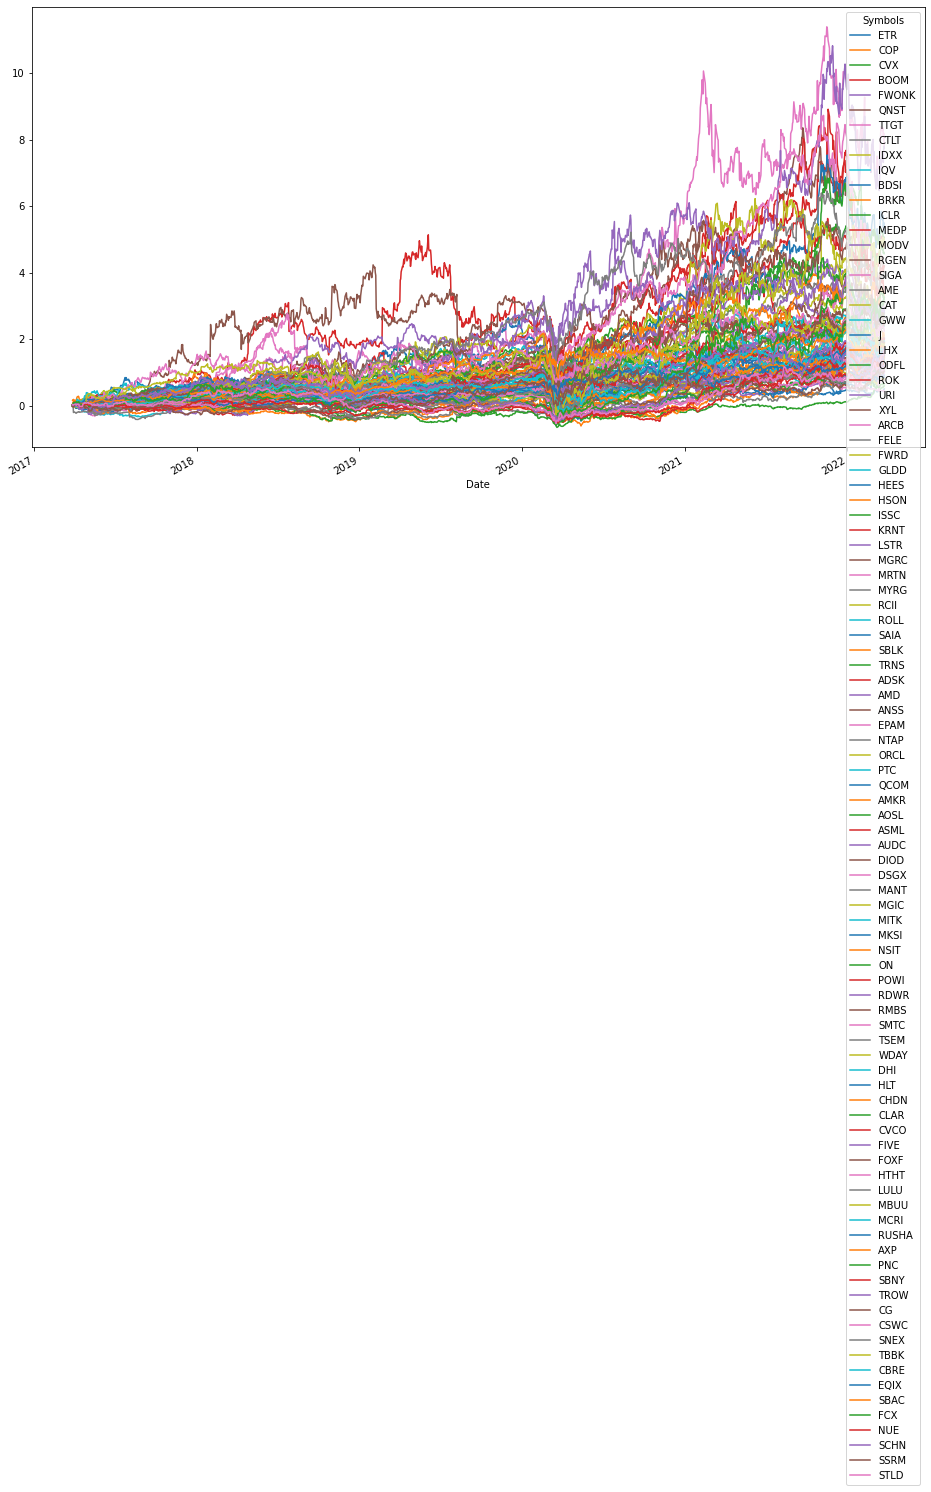

In [92]:
return_series_close.plot(figsize=(16,9))

In [93]:
return_series_close.tail(1)

Symbols,ETR,COP,CVX,BOOM,FWONK,QNST,TTGT,CTLT,IDXX,IQV,...,SNEX,TBBK,CBRE,EQIX,SBAC,FCX,NUE,SCHN,SSRM,STLD
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-25,0.501438,1.427184,0.593056,1.585425,0.98716,2.015915,7.820628,2.763796,2.500454,1.855909,...,1.121689,5.014,1.677745,0.849323,1.792784,3.253071,1.649076,1.687745,1.0369,1.653128


In [94]:
correlation = return_series_close.corr()
# # correlation
# fig, ax = plt.subplots(figsize=(16,10))
# sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [95]:
correlation1 = correlation[correlation < 0.2]
correlation1.dropna(thresh=1, inplace=True, axis=1)
correlation1.dropna(thresh=1, inplace=True, axis=0)

In [96]:
correlation1

Symbols,ETR,COP,CVX,BOOM,QNST,TTGT,CTLT,IDXX,IQV,BDSI,...,SNEX,TBBK,CBRE,EQIX,SBAC,FCX,NUE,SCHN,SSRM,STLD
Symbols,,,,,,,,,,,,,,,,,,,,,
ETR,NaN,0.087016,-0.085058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109199,NaN,0.075005
COP,0.087016,NaN,NaN,NaN,NaN,NaN,0.064382,0.163861,NaN,0.090327,...,NaN,NaN,NaN,-0.136009,-0.004604,NaN,NaN,NaN,-0.129315,NaN
CVX,-0.085058,NaN,NaN,0.140113,-0.09343,-0.102606,-0.278477,-0.198874,-0.042802,0.004207,...,-0.026063,0.189111,0.131277,-0.437976,-0.326623,0.138798,NaN,NaN,-0.366781,NaN
BOOM,NaN,NaN,0.140113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.165432,NaN,NaN,0.165669
QNST,NaN,NaN,-0.093430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FCX,NaN,NaN,0.138798,NaN,NaN,NaN,NaN,NaN,NaN,-0.035476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NUE,NaN,NaN,NaN,0.165432,NaN,NaN,NaN,NaN,NaN,-0.077926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.170389,NaN
SCHN,0.109199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.185204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107641,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

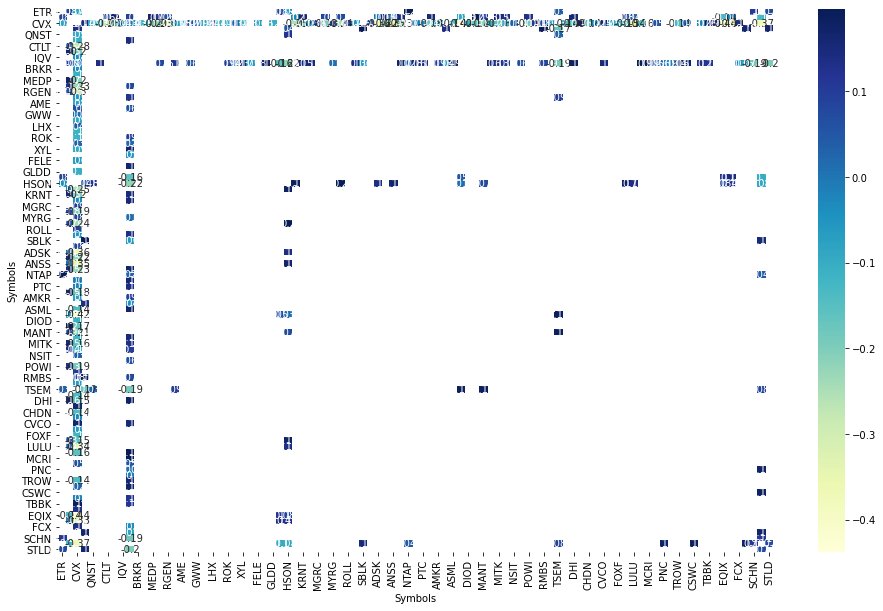

In [99]:
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation1, annot = True, ax = ax, cmap="YlGnBu")

In [100]:
len(correlation1)

95

In [101]:
all_stocks = []
for each in correlation1:
    all_stocks.append(each)

In [102]:
len(all_stocks)

95

In [104]:
indexes = []
for i in range(len(final_df_balanced)):
    each = final_df_balanced.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [105]:
final_balanced_df = final_df_balanced.iloc[indexes]
final_balanced_df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.0600,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.519
52,COP,ConocoPhillips,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,89.270,0.080856,1.177427e+11,...,3.687,-0.0180,11.444871,24.212095,10.774530,34.87,0.216126,0.420681,0.148794,0.650
60,CVX,Chevron Corporation,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,134.370,0.064948,2.590237e+11,...,5.173,-0.0490,14.129336,25.975256,12.151123,43.22,0.173580,0.334478,0.084378,0.523
284,BOOM,DMC Global Inc.,Energy,Increase,Above Fair Price,UnderValued,No Data,34.600,0.042223,6.669496e+08,...,0.093,0.2000,32.952380,372.043000,25.374456,999.00,0.150484,0.574497,0.163848,0.587
767,QNST,"QuinStreet, Inc.",Communication Services,Increase,Below Fair Price,UnderValued,No Data,10.760,-0.002836,5.836483e+08,...,0.223,0.2500,11.569893,48.251120,11.394409,999.00,0.107938,0.587975,0.269590,0.636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,FCX,"Freeport-McMoRan, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,42.740,0.018945,6.276241e+10,...,2.641,0.2890,12.039437,16.183264,59.676070,34.50,0.270827,0.507643,0.234986,0.799
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.640,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.741
809,SCHN,"Schnitzer Steel Industries, Inc",Basic Materials,Increase,Above Fair Price,UnderValued,No Data,41.580,0.019844,1.156909e+09,...,5.657,0.1000,5.766991,7.350186,13.935037,999.00,0.203970,0.472387,0.156052,0.675
852,SSRM,SSR Mining Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,19.525,0.006112,4.135610e+09,...,1.128,-0.2683,12.678572,17.309397,0.166831,999.00,0.145622,0.466643,0.122974,0.502


In [106]:
final_balanced_df.to_csv("updated_selected_stocks_balanced_v3.csv")